# Importing modules and the dataset

In [477]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [532]:
real_estate=pd.read_csv('Downloads/Real Estate.csv')

In [533]:
re=real_estate.copy()

In [534]:
real_estate.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [535]:
re.shape

(20640, 10)

In [536]:
re.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [537]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


In [538]:
re.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Filling the missing values in 'total_bedrooms' column

In [539]:
re['total_bedrooms'].fillna(re['total_bedrooms'].median(),inplace=True)
re.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Finding correlation among different attributes

In [540]:
recorr=re.corr()
recorr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


In [541]:
a=re['ocean_proximity'].value_counts().sort_index()

print(a)
re['ocean_proximity'].dtypes

<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: ocean_proximity, dtype: int64


dtype('O')

# Creating dummy variables for the categorical variable "ocean_proximity"

In [542]:
re=pd.get_dummies(re)
re

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


# Replacing 'longitude' with median longitude value

In [495]:
re['longitude'].replace(re['longitude'],re['longitude'].median(),inplace=True)
re

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-118.49,34.26,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-118.49,34.26,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-118.49,34.26,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-118.49,34.26,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-118.49,34.26,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-118.49,34.26,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-118.49,34.26,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-118.49,34.26,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-118.49,34.26,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


# Visualising the outliers in various attributes

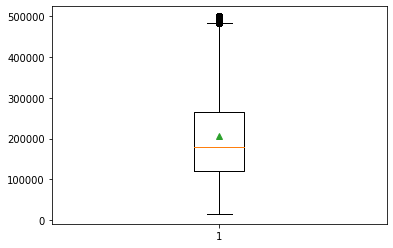

In [772]:
plt.boxplot(re['median_house_value'],showmeans=True)
plt.show()

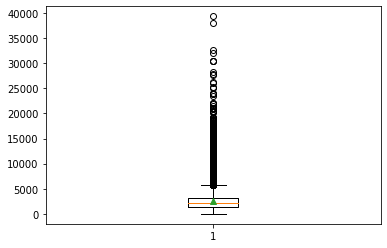

In [189]:
plt.boxplot(re['total_rooms'],showmeans=True)
plt.show()

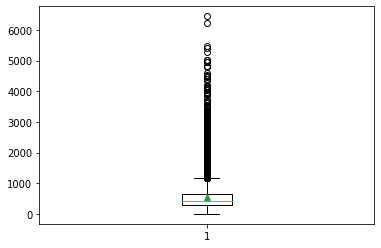

In [190]:
plt.boxplot(re['total_bedrooms'],showmeans=True)
plt.show()

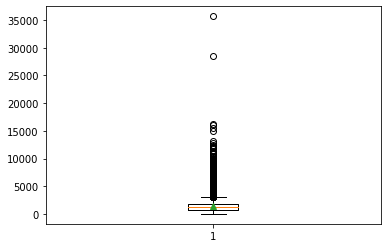

In [191]:
plt.boxplot(re['population'],showmeans=True)
plt.show()

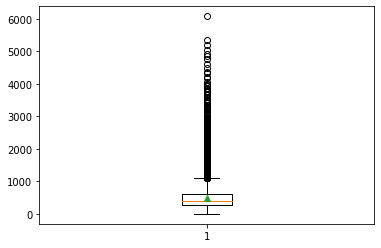

In [192]:
plt.boxplot(re['households'],showmeans=True)
plt.show()

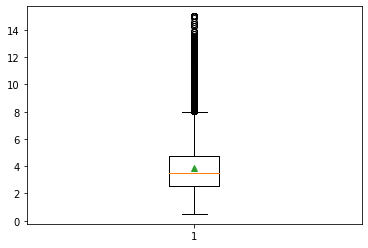

In [193]:
plt.boxplot(re['median_income'],showmeans=True)
plt.show()

# Detection and elimination of outliers

In [544]:
re1=re.copy()
min_threshold,max_threshold=re1.total_rooms.quantile([.1,.97])
print(min_threshold,max_threshold)
print(re1.shape)

941.0 7503.809999999987
(20640, 14)


In [545]:
re1=re1[(re1.total_rooms<max_threshold)&(re1.total_rooms>min_threshold)]
re1.shape

(17954, 14)

In [547]:
re2=re1.copy()
min_threshold,max_threshold=re1.total_bedrooms.quantile([.1,.99])
print(min_threshold,max_threshold)
print(re2.shape)

259.0 1512.4700000000012
(17954, 14)


In [548]:
re2=re2[(re2.total_bedrooms<max_threshold)&(re2.total_bedrooms>min_threshold)]
re2.shape

(15967, 14)

In [550]:
re3=re2.copy()
min_threshold,max_threshold=re2.population.quantile([.1,.99])
print(min_threshold,max_threshold)
print(re3.shape)

768.0 3817.34
(15967, 14)


In [551]:
re3=re3[(re3.population<max_threshold)&(re3.population>min_threshold)]
re3.shape

(14204, 14)

In [553]:
re4=re3.copy()
min_threshold,max_threshold=re3.households.quantile([.1,.99])
print(min_threshold,max_threshold)
print(re4.shape)

311.0 1229.0
(14204, 14)


In [554]:
re4=re4[(re4.households<max_threshold)&(re4.households>min_threshold)]
re4.shape

(12613, 14)

In [556]:
re5=re4.copy()
min_threshold,max_threshold=re4.median_income.quantile([.05,.98])
print(min_threshold,max_threshold)
print(re4.shape)

1.6652 8.446428000000001
(12613, 14)


In [557]:
re5=re5[(re5.median_income<max_threshold)&(re5.median_income>min_threshold)]
re5.shape

(11728, 14)

# calculating average no. of members in a household

In [558]:
re5["avg_people_in_household"]=re5["population"]/re5["households"]
re5["avg_people_in_household"]
re5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_people_in_household
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0,2.109842
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0,0,0,1,0,2.128405
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,0,0,0,1,0,1.788253
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,0,0,0,1,0,2.026891
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,0,0,0,1,0,2.172269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20632,-121.45,39.26,15,2319,416.0,1047,385,3.1250,115600,0,1,0,0,0,2.719481
20633,-121.53,39.19,27,2080,412.0,1082,382,2.5495,98300,0,1,0,0,0,2.832461
20634,-121.56,39.27,28,2332,395.0,1041,344,3.7125,116800,0,1,0,0,0,3.026163
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0,2.325635


In [559]:
re6=re5.copy()
min_threshold,max_threshold=re5.avg_people_in_household.quantile([.05,.99])
print(min_threshold,max_threshold)
print(re5.shape)

1.9168781331028522 4.941554165438921
(11728, 15)


In [560]:
re6=re6[(re6.avg_people_in_household<max_threshold)&(re6.avg_people_in_household>min_threshold)]
re6.shape

(11023, 15)

# Prediction model
# Dependent variable:"median_house_value"

In [561]:
x=re6.drop(["median_house_value","population","households","longitude"],axis=1)                
y=re6.median_house_value
y2=np.log(y)  #Taking logarithm of dependent variable

# Prediction model using Linear regression

In [711]:
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.2,shuffle=False)
clf=LinearRegression()  #classifier
clf.fit(x_train,y_train) #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Checking the accuracy of the model

In [712]:
print("Test accuracy is: ",clf.score(x_test,y_test))  #check accuracy
clf.score(x_train,y_train)

Test accuracy is:  0.715230615714475


0.7008237170205072

# Prediction model using RandomForestRegressor

In [713]:
rf2=RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)
model_rf2=rf2.fit(x_train,y_train)

print("Test set accuracy is: ",model_rf2.score(x_test,y_test))#check accuracy
print("Train set accuracy is: ",model_rf2.score(x_train,y_train)) #Train accuracy

Test set accuracy is:  0.8244109599035118
Train set accuracy is:  0.9177165715605187


In [762]:
pred=model_rf2.predict(x_test)

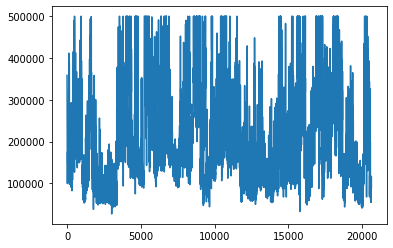

In [691]:
plt.plot(y)

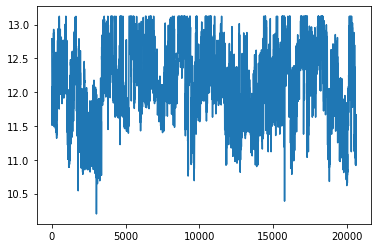

In [694]:
plt.plot(y2)

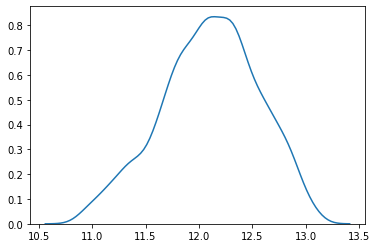

In [782]:
sns.distplot(pred,bins=10,kde=True,hist=False)

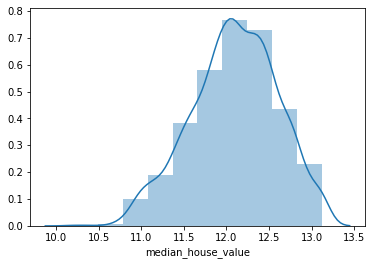

In [754]:
sns.distplot(y_test,bins=10,kde=True)

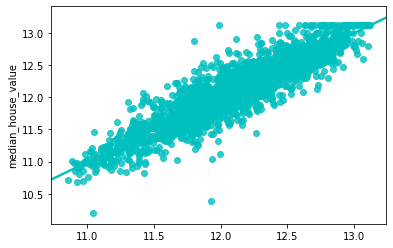

In [774]:
sns.regplot(pred,y_test,fit_reg=True,color='c') 

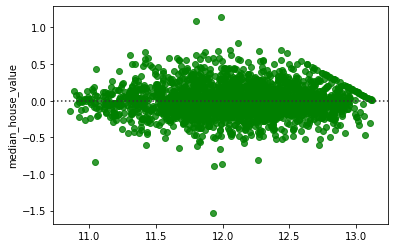

In [780]:
sns.residplot(pred,y_test,color='g')